## 1. Libraries to Load & Read csv File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import ast 

SVR = pd.read_csv('SVR_result.csv')
ANN = pd.read_csv('ANN_result.csv')
RFR = pd.read_csv('random_forest_polyregression.csv')
Poly = pd.read_csv('polyregression.csv')
PCA_poly = pd.read_csv('PCA.csv')
tSNE_poly = pd.read_csv('tSNE.csv')
MDS_poly = pd.read_csv('MDS.csv')

## 2. Compute the Percentage of Class0 to Class4 for All Folders 

In [2]:
Folder = []
for i in range(10):
    Folder.append(ast.literal_eval(RFR['y_test'][i]))

New_folder = []
for f in Folder:
    
    nwf = []
    for i in f:
        if i == 0:
            nwf.append(0)
        elif i > 0 and i <= 10:
            nwf.append(1)
        elif i > 10 and i <= 100:
            nwf.append(2)
        elif i > 100 and i <= 1000:
            nwf.append(3)
        elif i > 1000:
            nwf.append(4)
        else:
            pass
    New_folder.append(nwf)
    
print(New_folder)

folder_prob = []
for i in range(10):
    
    total = New_folder[i].count(0) + New_folder[i].count(1) + New_folder[i].count(2) + New_folder[i].count(3) + New_folder[i].count(4)
    prob0 = New_folder[i].count(0)/total
    prob1 = New_folder[i].count(1)/total
    prob2 = New_folder[i].count(2)/total
    prob3 = New_folder[i].count(3)/total
    prob4 = New_folder[i].count(4)/total
    folder_prob.append([prob0,prob1,prob2,prob3,prob4])
    
folder_prob = pd.DataFrame(folder_prob, columns=[0,1,2,3,4])
folder_prob

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

,0,1,2,3,4
0,0.461538,0.423077,0.096154,0.019231,0.000000
1,0.403846,0.365385,0.192308,0.038462,0.000000
2,0.500000,0.250000,0.211538,0.038462,0.000000
3,0.423077,0.442308,0.115385,0.019231,0.000000
4,0.500000,0.346154,0.134615,0.019231,0.000000
5,0.538462,0.269231,0.173077,0.019231,0.000000
6,0.480769,0.288462,0.230769,0.000000,0.000000
7,0.450980,0.372549,0.156863,0.019608,0.000000
8,0.607843,0.274510,0.098039,0.019608,0.000000
9,0.411765,0.352941,0.215686,0.000000,0.019608


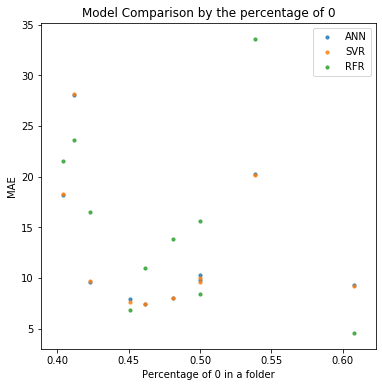

In [3]:
a = 0.8
size=10
fig = plt.figure(figsize=(6,6))
plt.scatter(folder_prob[0],ANN['MAE'],s=size,alpha=a,label='ANN')
plt.scatter(folder_prob[0],SVR['MAE'],s=size,alpha=a,label='SVR')
plt.scatter(folder_prob[0],RFR['MAE'],s=size,alpha=a,label='RFR')
plt.legend(loc='best')
plt.xlabel('Percentage of 0 in a folder')
plt.ylabel('MAE')
plt.title('Model Comparison by the percentage of 0')
plt.show()

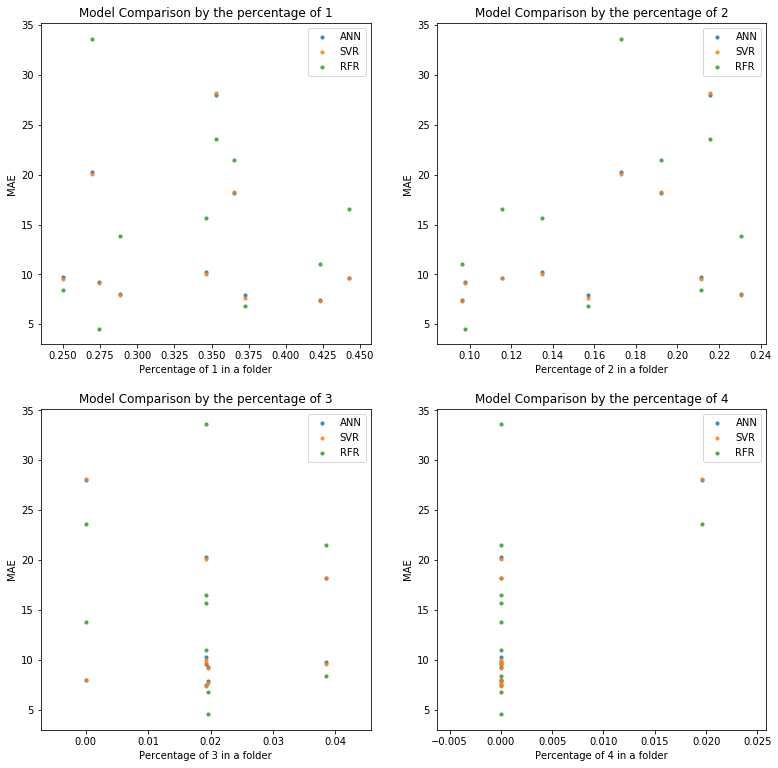

In [4]:
fig = plt.figure(figsize=(13,13))
for i in range(1,5):
    
    plt.subplot(220+i)
    plt.scatter(folder_prob[i],ANN['MAE'],s=size,alpha=a,label='ANN')
    plt.scatter(folder_prob[i],SVR['MAE'],s=size,alpha=a,label='SVR')
    plt.scatter(folder_prob[i],RFR['MAE'],s=size,alpha=a,label='RFR')
    plt.legend(loc='best')
    plt.xlabel('Percentage of '+str(i)+' in a folder')
    plt.ylabel('MAE')
    plt.title('Model Comparison by the percentage of '+str(i))

plt.show()

## 3. One-Sided Paired t-test for Polynomial Regressions Comparison (Poly, PCA Poly, t-SNE Poly, MDS Poly, RFP)

## 3.1 MAE

In [5]:
print('The mean of MAE in Poly:',np.mean(Poly['MAE']))
print('The mean of MAE in PCA-Poly:',np.mean(PCA_poly['MAE']))
print('The mean of MAE in tSNE-Poly:',np.mean(tSNE_poly['MAE']))
print('The mean of MAE in MDS-Poly:',np.mean(MDS_poly['MAE']))
print('The mean of MAE in RF-Poly:',np.mean(RFR['MAE']))

The mean of MAE in Poly: 413.48274671295604
The mean of MAE in PCA-Poly: 18.6388230405396
The mean of MAE in tSNE-Poly: 501.977823162939
The mean of MAE in MDS-Poly: 239.96762131327174
The mean of MAE in RF-Poly: 15.555962392707409


In [6]:
Classifiers = [Poly['MAE'],PCA_poly['MAE'],tSNE_poly['MAE'],MDS_poly['MAE'],RFR['MAE']]
ClassifiersNames = ['Poly','PCA','tSNE','MDS','RFR']
col_pvalue = []
for model_i in Classifiers:
    row_pvalue = []
    for model_j in Classifiers:

        c_pvalue = stats.ttest_rel(model_i, model_j).pvalue*0.5
        row_pvalue.append(c_pvalue)
    col_pvalue.append(row_pvalue)
    
classifiers_pvalue = pd.DataFrame(col_pvalue, columns=ClassifiersNames, index=ClassifiersNames)
classifiers_pvalue

,Poly,PCA,tSNE,MDS,RFR
Poly,NaN,0.000010,0.249488,0.003968,0.000009
PCA,0.000010,NaN,0.004453,0.000701,0.064323
tSNE,0.249488,0.004453,NaN,0.044377,0.004244
MDS,0.003968,0.000701,0.044377,NaN,0.000631
RFR,0.000009,0.064323,0.004244,0.000631,NaN


/Users/john_stuart_mill/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


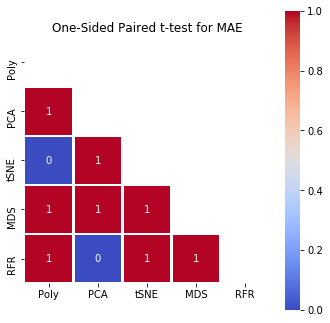

In [7]:
binary_value = pd.DataFrame(np.where(classifiers_pvalue.values <= 0.05,1,0), columns=ClassifiersNames, index=ClassifiersNames)
f, ax = plt.subplots(figsize=(5.5, 5.5))
plt.title('One-Sided Paired t-test for MAE')
mask = np.zeros_like(binary_value, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(binary_value, cmap="coolwarm",square=True, annot = True, linecolor='white',linewidths=1.5, mask=mask)

## 3.2 MSE

In [8]:
print('The mean of MSE in Poly:',np.mean(Poly['MSE']))
print('The mean of MSE in PCA-Poly:',np.mean(PCA_poly['MSE']))
print('The mean of MSE in tSNE-Poly:',np.mean(tSNE_poly['MSE']))
print('The mean of MSE in MDS-Poly:',np.mean(MDS_poly['MSE']))
print('The mean of MSE in RF-Poly:',np.mean(RFR['MSE']))

The mean of MSE in Poly: 1133551.3475656104
The mean of MSE in PCA-Poly: 4078.1120582948556
The mean of MSE in tSNE-Poly: 1151470.7542310008
The mean of MSE in MDS-Poly: 301495.66828905296
The mean of MSE in RF-Poly: 6173.867516390568


In [9]:
Classifiers = [Poly['MSE'],PCA_poly['MSE'],tSNE_poly['MSE'],MDS_poly['MSE'],RFR['MSE']]
ClassifiersNames = ['Poly','PCA','tSNE','MDS','RFR']
col_pvalue = []
for model_i in Classifiers:
    row_pvalue = []
    for model_j in Classifiers:

        c_pvalue = stats.ttest_rel(model_i, model_j).pvalue*0.5
        row_pvalue.append(c_pvalue)
    col_pvalue.append(row_pvalue)
    
classifiers_pvalue = pd.DataFrame(col_pvalue, columns=ClassifiersNames, index=ClassifiersNames)
classifiers_pvalue

,Poly,PCA,tSNE,MDS,RFR
Poly,NaN,0.024894,0.489535,0.050279,0.025112
PCA,0.024894,NaN,0.016044,0.005479,0.186489
tSNE,0.489535,0.016044,NaN,0.041141,0.016176
MDS,0.050279,0.005479,0.041141,NaN,0.005581
RFR,0.025112,0.186489,0.016176,0.005581,NaN


/Users/john_stuart_mill/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


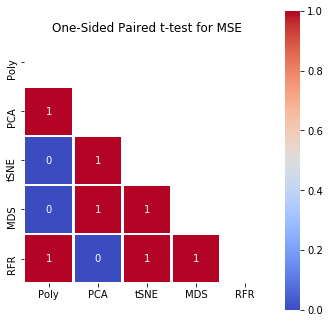

In [10]:
binary_value = pd.DataFrame(np.where(classifiers_pvalue.values <= 0.05,1,0), columns=ClassifiersNames, index=ClassifiersNames)
f, ax = plt.subplots(figsize=(5.5, 5.5))
plt.title('One-Sided Paired t-test for MSE')
mask = np.zeros_like(binary_value, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(binary_value, cmap="coolwarm",square=True, annot = True, linecolor='white',linewidths=1.5, mask=mask)

## 4. One-Sided Paired t-test for ANN, SVR, & RFP

## 4.1 MAE

In [11]:
print('The mean of MAE in ANN:',np.mean(ANN['MAE']))
print('The mean of MAE in SVR:',np.mean(SVR['MAE']))
print('The mean of MAE in RFR:',np.mean(RFR['MAE']))
print('The median of MAE in ANN:',np.median(ANN['MAE']))
print('The median of MAE in SVR:',np.median(SVR['MAE']))
print('The median of MAE in RFR:',np.median(RFR['MAE']))

The mean of MAE in ANN: 12.883730050863004
The mean of MAE in SVR: 12.793327082768837
The mean of MAE in RFR: 15.555962392707409
The median of MAE in ANN: 9.688946666488283
The median of MAE in SVR: 9.611611627805438
The median of MAE in RFR: 14.738461538461536


[Text(0, 0, 'ANN'), Text(0, 0, 'SVR'), Text(0, 0, 'RFR')]

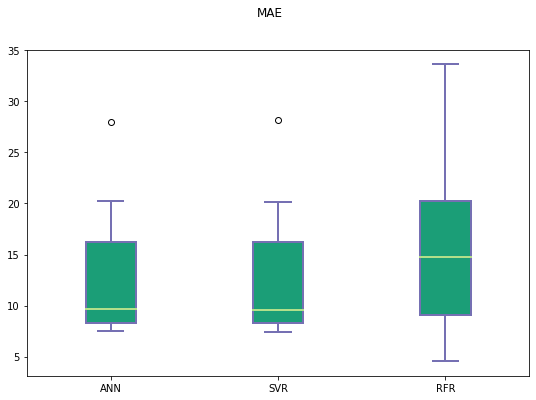

In [12]:
MAE_box = [ANN['MAE'],SVR['MAE'],RFR['MAE']]
fig = plt.figure(1, figsize=(9, 6))
fig.suptitle('MAE')
ax = fig.add_subplot(111)

bp = ax.boxplot(MAE_box, patch_artist=True)
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#f000ff')
    
ax.set_xticklabels(['ANN', 'SVR', 'RFR', 'PCA'])

In [13]:
Classifiers = [ANN['MAE'],SVR['MAE'],RFR['MAE']]
ClassifiersNames = ['ANN','SVR','RFR']
col_pvalue = []
for model_i in Classifiers:
    row_pvalue = []
    for model_j in Classifiers:

        c_pvalue = stats.ttest_rel(model_i, model_j).pvalue*0.5
        row_pvalue.append(c_pvalue)
    col_pvalue.append(row_pvalue)
    
classifiers_pvalue = pd.DataFrame(col_pvalue, columns=ClassifiersNames, index=ClassifiersNames)
classifiers_pvalue

,ANN,SVR,RFR
ANN,NaN,0.044851,0.083538
SVR,0.044851,NaN,0.078320
RFR,0.083538,0.078320,NaN


/Users/john_stuart_mill/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


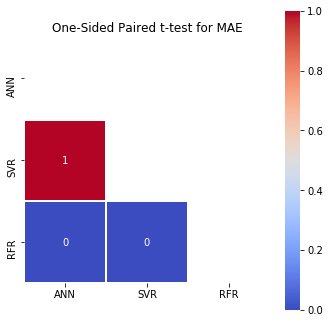

In [14]:
binary_value = pd.DataFrame(np.where(classifiers_pvalue.values <= 0.05,1,0), columns=ClassifiersNames, index=ClassifiersNames)
f, ax = plt.subplots(figsize=(5.5, 5.5))
plt.title('One-Sided Paired t-test for MAE')
mask = np.zeros_like(binary_value, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(binary_value, cmap="coolwarm",square=True, annot = True, linecolor='white',linewidths=1.5, mask=mask)

## 4.2 MSE

In [15]:
print('The mean of MSE in ANN:',np.mean(ANN['MSE']))
print('The mean of MSE in SVR:',np.mean(SVR['MSE']))
print('The mean of MSE in RFR:',np.mean(RFR['MSE']))
print('The median of MSE in ANN:',np.median(ANN['MSE']))
print('The median of MSE in SVR:',np.median(SVR['MSE']))
print('The median of MSE in RFR:',np.median(RFR['MSE']))

The mean of MSE in ANN: 4177.433585379901
The mean of MSE in SVR: 4210.680305990072
The mean of MSE in RFR: 6173.867516390568
The median of MSE in ANN: 985.6791113723141
The median of MSE in SVR: 997.2910877365691
The median of MSE in RFR: 2321.575598384159


[Text(0, 0, 'ANN'), Text(0, 0, 'SVR'), Text(0, 0, 'RFR')]

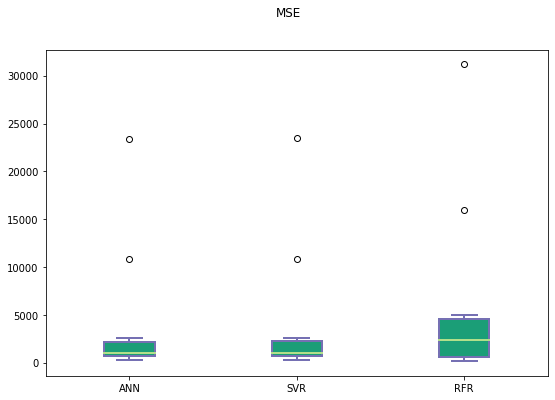

In [16]:
MAE_box = [ANN['MSE'],SVR['MSE'],RFR['MSE']]
fig = plt.figure(1, figsize=(9, 6))
fig.suptitle('MSE')
ax = fig.add_subplot(111)

bp = ax.boxplot(MAE_box, patch_artist=True)
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#f000ff')
    
ax.set_xticklabels(['ANN', 'SVR', 'RFR', 'PCA'])

In [17]:
Classifiers = [ANN['MSE'],SVR['MSE'],RFR['MSE']]
ClassifiersNames = ['ANN','SVR','RFR']
col_pvalue = []
for model_i in Classifiers:
    row_pvalue = []
    for model_j in Classifiers:

        c_pvalue = stats.ttest_rel(model_i, model_j).pvalue*0.5
        row_pvalue.append(c_pvalue)
    col_pvalue.append(row_pvalue)
    
classifiers_pvalue = pd.DataFrame(col_pvalue, columns=ClassifiersNames, index=ClassifiersNames)
classifiers_pvalue

,ANN,SVR,RFR
ANN,NaN,0.001931,0.196850
SVR,0.001931,NaN,0.200597
RFR,0.196850,0.200597,NaN


/Users/john_stuart_mill/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


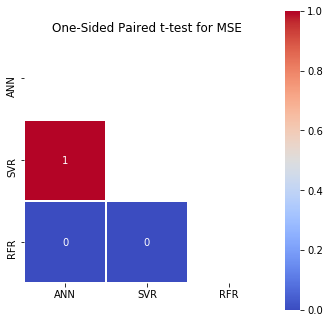

In [18]:
binary_value = pd.DataFrame(np.where(classifiers_pvalue.values <= 0.05,1,0), columns=ClassifiersNames, index=ClassifiersNames)
f, ax = plt.subplots(figsize=(5.5, 5.5))
plt.title('One-Sided Paired t-test for MSE')
mask = np.zeros_like(binary_value, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(binary_value, cmap="coolwarm",square=True, annot = True, linecolor='white',linewidths=1.5, mask=mask)

## 4.3 Efficiency 

In [19]:
print('The mean of runtime in ANN:',np.mean(ANN['TIME']))
print('The mean of runtime in SVR:',np.mean(SVR['TIME']))
print('The mean of runtime in RFR:',np.mean(RFR['Runtime']))
print('The median of runtime in ANN:',np.median(ANN['TIME']))
print('The median of runtime in SVR:',np.median(SVR['TIME']))
print('The median of runtime in RFR:',np.median(RFR['Runtime']))

The mean of runtime in ANN: 5.359211444854736
The mean of runtime in SVR: 0.049860572814941405
The mean of runtime in RFR: 36.75118479519998
The median of runtime in ANN: 5.347521066665649
The median of runtime in SVR: 0.053134918212890625
The median of runtime in RFR: 36.77288522649999


In [20]:
Classifiers = [ANN['TIME'],SVR['TIME'],RFR['Runtime']]
ClassifiersNames = ['ANN','SVR','RFR']
col_pvalue = []
for model_i in Classifiers:
    row_pvalue = []
    for model_j in Classifiers:

        c_pvalue = stats.ttest_rel(model_i, model_j).pvalue*0.5
        row_pvalue.append(c_pvalue)
    col_pvalue.append(row_pvalue)
    
classifiers_pvalue = pd.DataFrame(col_pvalue, columns=ClassifiersNames, index=ClassifiersNames)
classifiers_pvalue

,ANN,SVR,RFR
ANN,NaN,1.401458e-13,1.738719e-06
SVR,1.401458e-13,NaN,4.278071e-07
RFR,1.738719e-06,4.278071e-07,NaN


/Users/john_stuart_mill/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


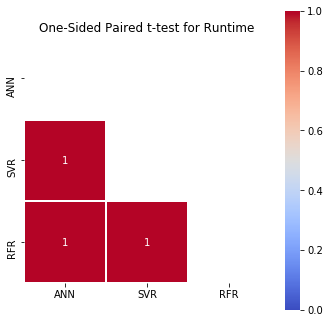

In [21]:
binary_value = pd.DataFrame(np.where(classifiers_pvalue.values <= 0.05,1,0), columns=ClassifiersNames, index=ClassifiersNames)
f, ax = plt.subplots(figsize=(5.5, 5.5))
plt.title('One-Sided Paired t-test for Runtime')
mask = np.zeros_like(binary_value, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(binary_value, cmap="coolwarm",square=True, annot = True, linecolor='white',linewidths=1.5, mask=mask)